# Программирование для всех<br>(основы работы с Python)

*Алла Тамбовцева*

## Практикум 10.2. Построение и раскраска карт с `geopandas`

### Подготовка к работе

Установим библиотеку `geopandas`, это надстройка над `pandas`. Она позволяет загружать файлы с географической информацией (в частности, файлы `.geojson`) и отрисовывать карты.

In [ ]:
!pip install geopandas

Установим библиотеку `seaborn`, это надстройка над графической библиотекой `matplotlib`. Она позволяет строить более продвинутые (и более симпатичные) графики:

In [ ]:
!pip install seaborn

После установки библиотек стоит перезапустить ядро (меню *Kernel* – *Restart*), чтобы Python в текущем сеансе работы «подтянул» необходимые пути к только что установленным библиотекам. Импортируем библиотеки:

In [1]:
import geopandas as gpd
import seaborn as sns

Заодно импортируем обычную библиотеку `pandas` и модуль `pyplot` из графической библиотеки `matplotlib` для отрисовки графиков (последний обычно сокращается до `plt`):

In [2]:
import pandas as pd
from matplotlib import pyplot as plt

### Отрисовываем карту

В файле `Москва_Moscow.geojson` хранится географическая информация о районах Москвы – набор точек для определения и отрисовки границ района ([источник](https://github.com/timurkanaz/Russia_geojson_OSM/tree/master/GeoJson's) данных, там есть федеральные округа с делением на регионы и регионы с делением на районы, при открытии geojson на Github все отображается в виде готовой карты).

При загрузке geojson-файла через функцию `read_file()` данные внешне ничем не отличаются от обычного датафрейма `pandas`:

In [3]:
df_geo = gpd.read_file("Москва_Moscow.geojson")
df_geo.head()

,district,geometry
0,район Богородское,"POLYGON ((37.67021 55.83874, 37.67023 55.83865..."
1,район Вешняки,"POLYGON ((37.76730 55.73427, 37.76752 55.73415..."
2,район Восточное Измайлово,"POLYGON ((37.79943 55.79324, 37.79943 55.79322..."
3,район Восточный,"MULTIPOLYGON (((37.84533 55.81356, 37.84981 55..."
4,район Гольяново,"POLYGON ((37.74593 55.80903, 37.74604 55.80698..."


Каждый район – это отдельный объект на карте. Чисто геометрически, этот объект – многоугольник, то есть какая-то область, ограниченная замкнутой ломаной линией, *polygon* на английском языке. Поэтому здесь в таблице в столбце `geometry` хранятся объекты специального типа *POLYGON*, которые внутри похожи на кортежи с парными координатами точек (широта и долгота) в выбранной географической проекции. По этим точкам район отрисовывается на карте. В столбце `geometry` также есть объекты типа *MULTIPOLYGON* для больших районов или районов со сложными границами, которые удобнее собрать из нескольких многоугольников.

К такому более продвинутому датафрейму типа *GeoDataFrame* можно применить метод `.plot()` и построить карту!

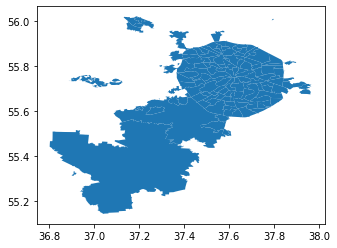

In [4]:
df_geo.plot();

Или метод `boundary.plot()` для отрисовки только границ без заливки:

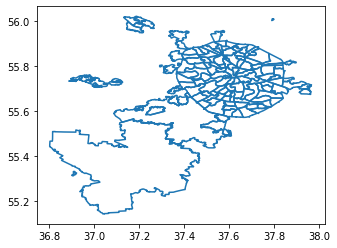

In [5]:
df_geo.boundary.plot();

Так как в данных, которые мы отобрали для кластерного анализа, нет районов Зеленограда и некоторых районов Новой Москвы (мы основывались на станциях метро, а с метро там не очень), уберем их с карты:

In [6]:
# список районов для удаления с карты

out = ["Троицкий административный округ", "район Кунцево", "район Силино", 
       "район Старое Крюково", "район Крюково",
       "район Матушкино", "район Савелки"]

# через ~ строим отрицание к результату isin()
# выбираем все, что не в out по столбцу district

df_geo = df_geo[~df_geo["district"].isin(out)]

Обновим карту:

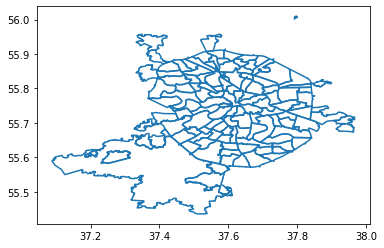

In [7]:
df_geo.boundary.plot();

### Сюжет 1: добавляем точки

Для этой части практикума нам потребуются данные из первого листа файла `flats-final.xlsx` из практикума 10.1  – информация по квартирам в Москве (выгрузка с ЦИАН по состоянию на май 2025):

* `price`: цена в рублях;
* `lprice`: логарифм цены;
* `square`: площадь квартиры, в кв. метрах;
* `rooms`: число комнат;
* `floor`: этаж;
* `mfloor`: число этажей в доме;
* `station`: станция метро;
* `metro`: доступность и расстояние до метро;
* `ametro`: шаговая доступность метро (1 – да, 0 – нет);
* `dmetro`: расстояние до метро (на транспорте или пешком), в минутах;
* `link`: ссылка на объявление;
* `add`: адрес;
* `lat`: широта;
* `lon`: долгота.

Загружаем данные:

In [8]:
flats = pd.read_excel("flats-final.xlsx", sheet_name = 0)
flats.head()

,price,lprice,square,rooms,floor,mfloor,station,metro,ametro,dmetro,link,add,lat,lon
0,12000000,16.300417,60.0,3,1,9,метро Аннино,6 минут на транспорте,0,6,https://www.cian.ru/sale/flat/314948168/,"Чертановская ул., 66К2",55.596930,37.585664
1,12400000,16.333207,60.1,3,1,9,метро Аннино,6 минут на транспорте,0,6,https://www.cian.ru/sale/flat/313019655/,"Чертановская ул., 66К2",55.596930,37.585664
2,11499999,16.257858,37.9,1,16,20,метро Аннино,19 минут пешком,1,19,https://www.cian.ru/sale/flat/315677385/,"ул. Газопровод, 15",55.589274,37.612650
3,11950000,16.296242,40.0,1,2,17,метро Аннино,19 минут пешком,1,19,https://www.cian.ru/sale/flat/316242727/,"ул. Газопровод, 15",55.589274,37.612650
4,36000000,17.399029,120.0,4,1,9,метро Аннино,7 минут на транспорте,0,7,https://www.cian.ru/sale/flat/309425036/,"Старокачаловская ул., 14",55.569708,37.587596


Осталось нанести точки, соответствующие квартирам (у нас для них есть координаты – в столбцах `lon` и `lat`), на полученную карту. Для этого нужно в одних и тех же осях построить два графика – карту и диаграмму рассеивания с точками-квартирами:

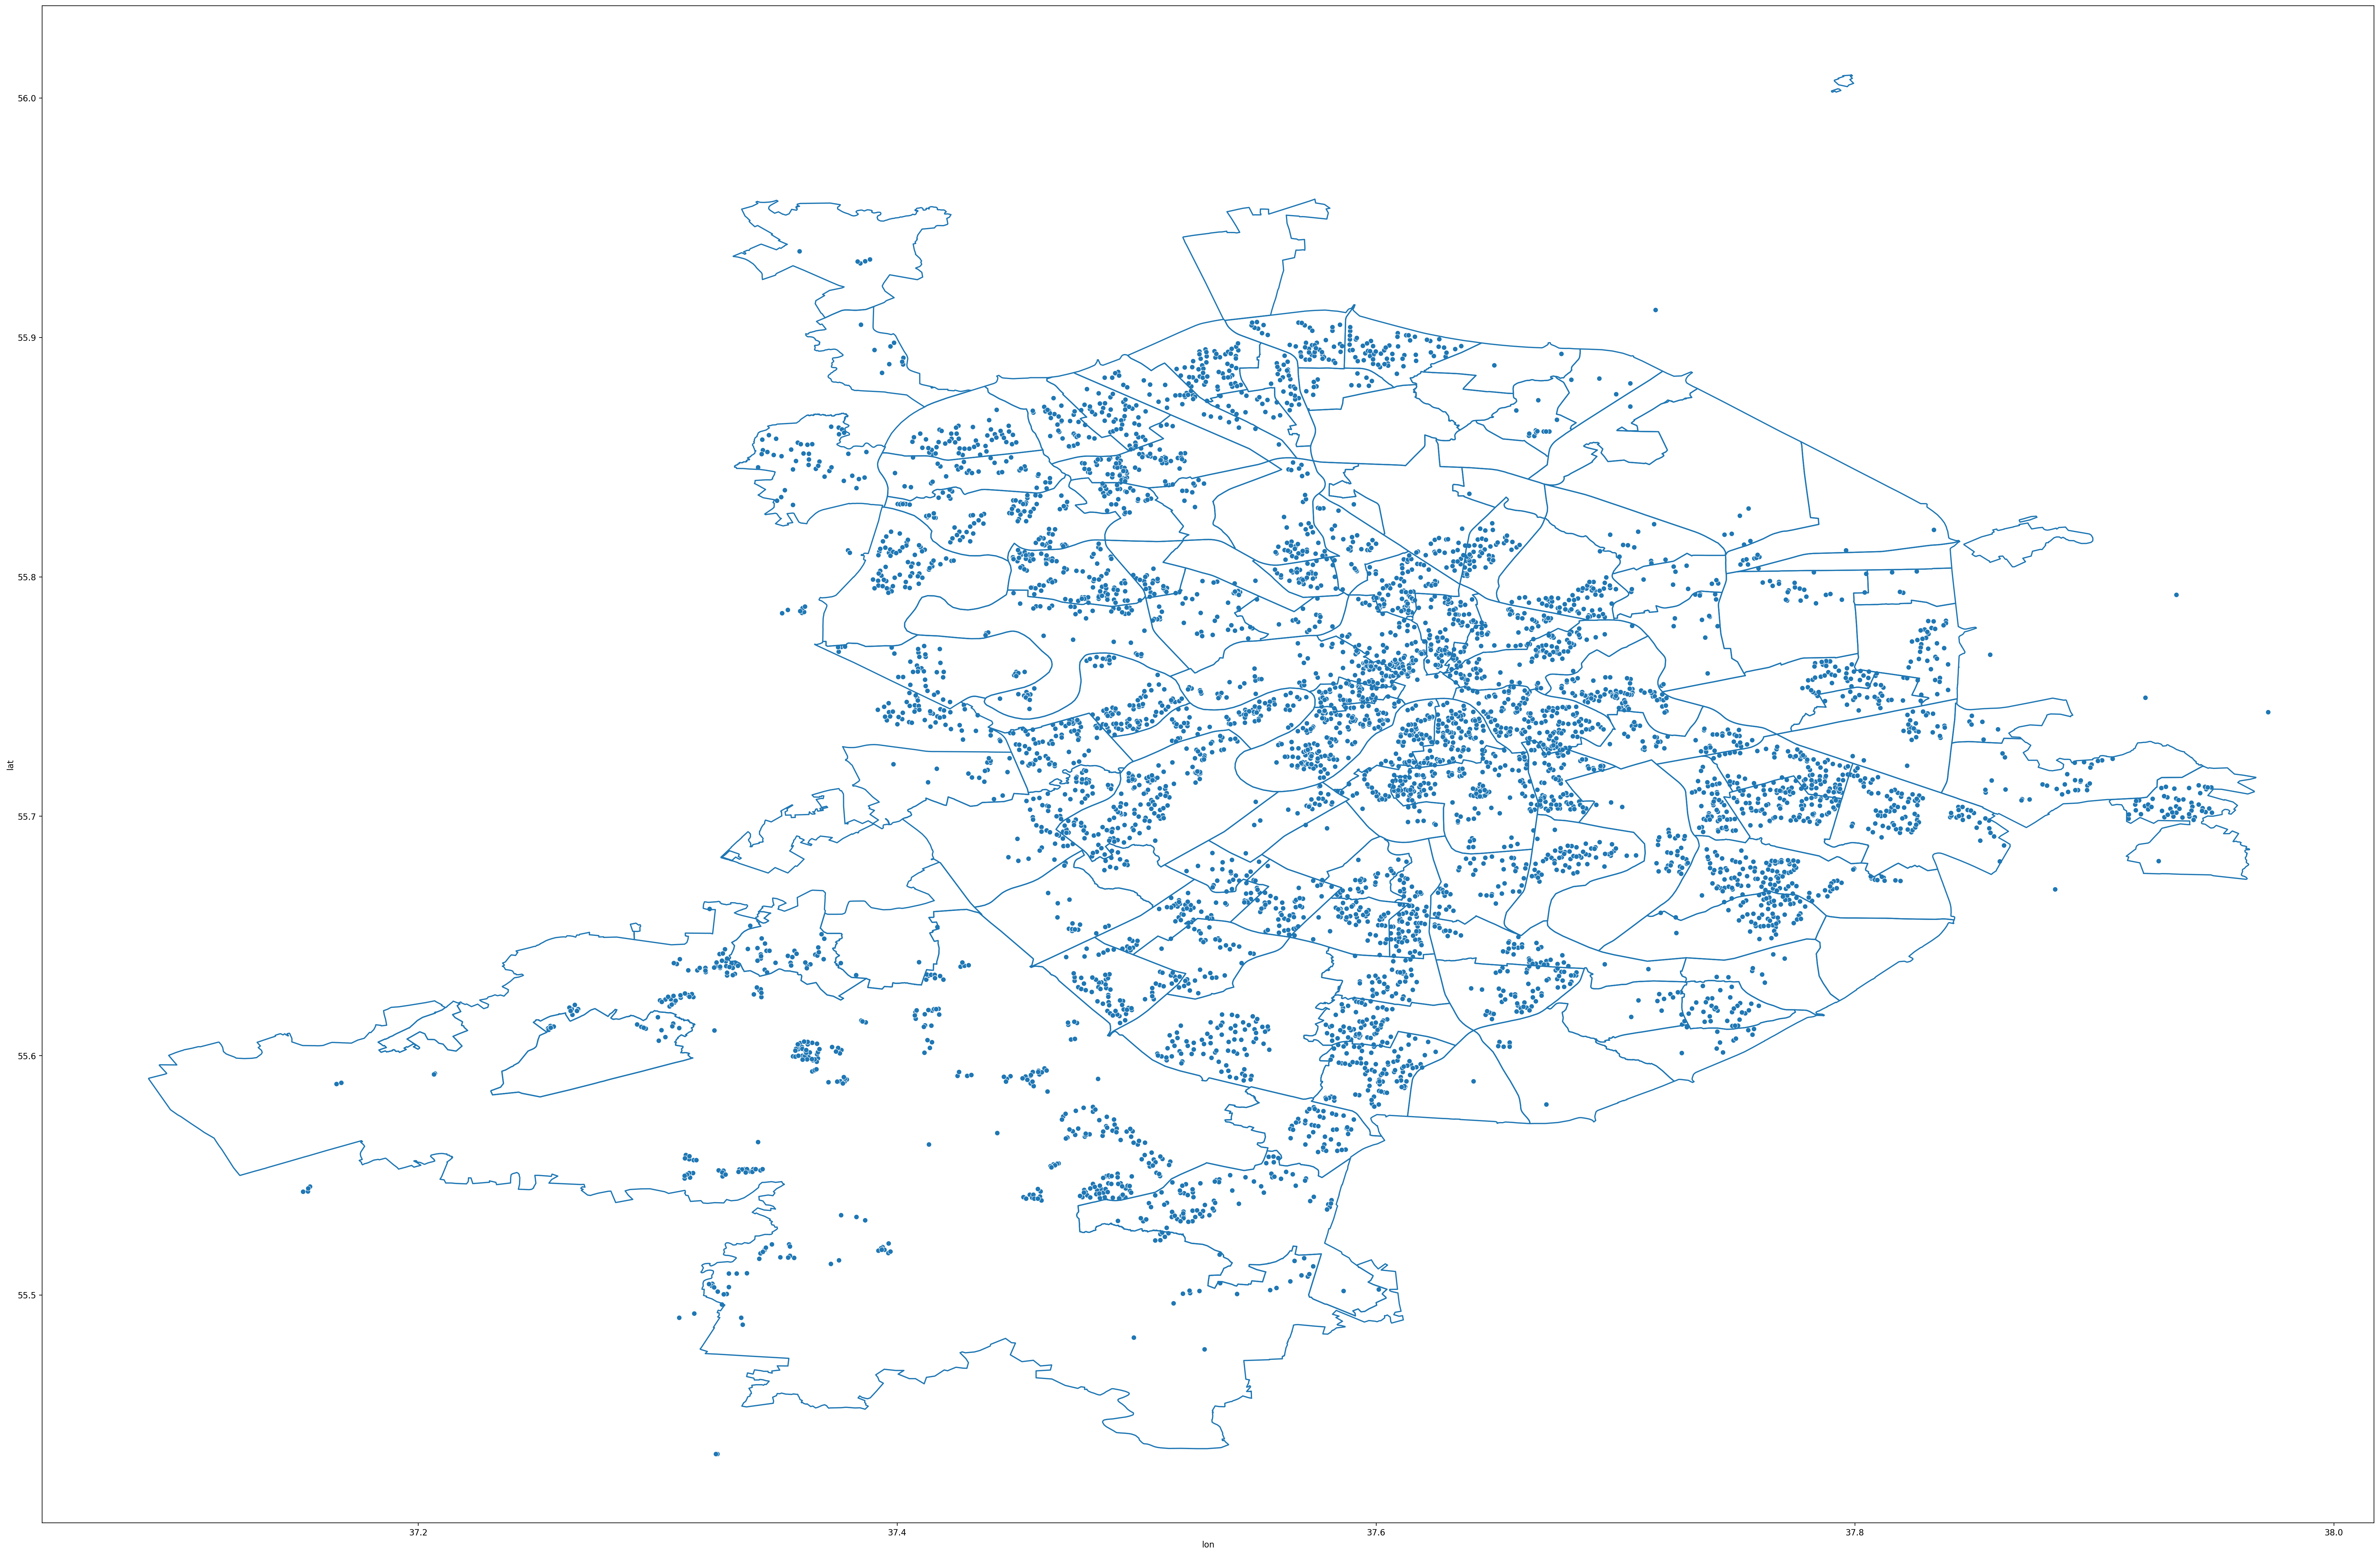

In [9]:
# создаем большой график 50 на 50 дюймов
# хорошее разрешение – 200 точек на дюйм

# в fig остается изображение, которое выгрузим в файл, 
# в axes хранятся оси для редактирования

fig, axes = plt.subplots(figsize = (50, 50), dpi = 200)

# строим карту в осях axes

df_geo.boundary.plot(ax = axes);

# в тех же осях axes строим диаграмму рассеивания
# по оси x – широта, по оси y – долгота

sns.scatterplot(data = flats, 
                x = "lon", 
                y = "lat", 
                ax = axes);

# большую картинку можно сохранить как pdf
# выгружаем изображение fig в файл map01.pdf

fig.savefig("map01.pdf")

In [ ]:
# все то же самое, только точки раскрашены 
# в зависимости от числа комнат – название столбца в hue

fig, axes = plt.subplots(figsize = (50, 50), dpi = 200)
df_geo.boundary.plot(ax = axes);

sns.scatterplot(data = flats, 
                x = "lon", 
                y = "lat", 
                hue = "rooms",
                ax = axes);

fig.savefig("map02.pdf")

### Сюжет 2:  раскрашиваем районы

Для этой части практикума нам потребуются данные из файла `flats_with_district.csv`. В этом файле хранится медианная цена и медианная площадь квартир, выставленных на продажу в разных районах Москвы:


* `price`: медианная цена в рублях;
* `square`: медианная площадь квартиры, в кв. метрах;
* `district`: название района.

Загрузим данные:

In [ ]:
flats_agg = pd.read_csv("flats_with_district.csv")
flats_agg.head()

In [ ]:
print(flats_agg.shape) # 116 районов

Объединим датафрейм с геоданными`df_geo` с датафреймом `flats_agg` – нам нужно, чтобы к географическим данным добавилась информация, на основе которой мы сможем раскрасить районы:

In [ ]:
# df_geo: геодатафрейм из файла geojson
# flats_agg: наш датафрейм с ценой и площадью квартир
# объединяем по общему столбцу district,
# названия районов везде одинаковые

final = df_geo.merge(flats_agg, on = "district")
final.head()

Строим карту:

* в `column` – название столбца, в соответствии со значениями которого мы хотим раскрасить районы;
* в `cmap` – название цветовой палитры, здесь градиент от бледно-оранжевого до темно-красного.

In [ ]:
final.plot(column = 'price', cmap = 'OrRd');

Можем выбрать палитру поярче [отсюда](https://matplotlib.org/stable/users/explain/colors/colormaps.html) и построить такую же карту, но для медианной площади квартир:

In [ ]:
# заодно добавим легенду графика,
# чтобы видеть, какой цвет чему соответствует

final.plot(column = 'square', cmap = 'GnBu', legend=True);

Увеличим карту, как в предыдущей части:

In [ ]:
fig, axes = plt.subplots(figsize = (9, 9), dpi = 200)

# legend_kwds = {'shrink': 0.5}
# сужаем легенду с цветами справа, 
# она из-за увеличения размера карты стала гигантской

final.plot(column = 'square', 
           cmap = 'GnBu', 
           legend = True, 
           legend_kwds={'shrink': 0.5},
           ax = axes);

# сохраним в файл
fig.savefig("map03.pdf")